***Advertisement CTR data analysis***

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay

In [ ]:
# 1. Reading the data and data information

df = pd.read_csv('Ad_Click_prediciton_test.csv', delimiter=',', encoding='utf-8', header=0)
df.head(10)



,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1
0,411705,2017-07-08 00:00,732573,J,404347,53587,1,NaN,5.0,Male,5.0,3.0,NaN,0
1,208263,2017-07-08 00:00,172910,I,118601,28529,3,82527.0,NaN,NaN,NaN,NaN,NaN,1
2,239450,2017-07-08 00:00,172910,I,118601,28529,4,82527.0,NaN,NaN,NaN,NaN,NaN,1
3,547761,2017-07-08 00:00,557318,G,118601,28529,5,82527.0,1.0,Male,1.0,3.0,1.0,0
4,574275,2017-07-08 00:00,923896,H,118601,28529,5,82527.0,9.0,Female,3.0,1.0,NaN,1
5,394913,2017-07-08 00:00,854182,I,118601,28529,4,82527.0,1.0,Male,1.0,3.0,4.0,1
6,562747,2017-07-08 00:00,1101628,D,118601,28529,4,82527.0,2.0,Male,2.0,3.0,2.0,1
7,224359,2017-07-08 00:00,1101628,D,118601,28529,5,82527.0,2.0,Male,2.0,3.0,2.0,1
8,395004,2017-07-08 00:00,1088284,I,118601,28529,4,82527.0,2.0,Male,2.0,3.0,1.0,0
9,572855,2017-07-08 00:00,972585,H,118601,28529,5,82527.0,2.0,Male,2.0,3.0,2.0,0


In [42]:
print("Initial Data Shape:", df.shape)
print(df.head())
print(df.info())

Initial Data Shape: (128858, 14)
   session_id          DateTime  user_id product  campaign_id  webpage_id  \
0      411705  2017-07-08 00:00   732573       J       404347       53587   
1      208263  2017-07-08 00:00   172910       I       118601       28529   
2      239450  2017-07-08 00:00   172910       I       118601       28529   
3      547761  2017-07-08 00:00   557318       G       118601       28529   
4      574275  2017-07-08 00:00   923896       H       118601       28529   

   product_category_1  product_category_2  user_group_id  gender  age_level  \
0                   1                 NaN            5.0    Male        5.0   
1                   3             82527.0            NaN     NaN        NaN   
2                   4             82527.0            NaN     NaN        NaN   
3                   5             82527.0            1.0    Male        1.0   
4                   5             82527.0            9.0  Female        3.0   

   user_depth  city_developme

In [43]:
# 2. Data cleaning

# Convert DateTime
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

# Fill missing categorical values with defaults
df['gender'] = df['gender'].fillna('Unknown')
df['product_category_2'] = df['product_category_2'].fillna(0).astype(int)
df['var_1'] = df['var_1'].fillna('Unknown')

# Drop duplicates
df.drop_duplicates(inplace=True) 

In [44]:
# 3. Feature engineering

# Time-based features
df['hour'] = df['DateTime'].dt.hour
df['day_of_week'] = df['DateTime'].dt.day_name()

# Engagement label
df['high_engagement'] = df['user_depth'] > 3

In [49]:
# 4. Exploratory data analysis

# 4.1 Top product categories
top_categories = df['product_category_1'].value_counts()
print("\nTop Product Categories:\n", top_categories)

# 4.2 Product category engagement by gender
category_gender = df.groupby(['product_category_1', 'gender'])['session_id'].count().unstack(fill_value=0)
print("\nProduct Category by Gender:\n", category_gender)

# 4.3 Campaign performance
campaign_perf = df.groupby('campaign_id')['session_id'].count().sort_values(ascending=False)
print("\nTop Campaigns:\n", campaign_perf)

# 4.4 Peak browsing hours
hourly_activity = df['hour'].value_counts().sort_index()
print("\nSessions by Hour:\n", hourly_activity)


Top Product Categories:
 product_category_1
5    43917
4    31765
1    20846
3    19503
2    12827
Name: count, dtype: int64

Product Category by Gender:
 gender              Female   Male  Unknown
product_category_1                        
1                     1960  17416     1470
2                     1577  10703      547
3                     1706  16982      815
4                     3497  27147     1121
5                     5909  36277     1731

Top Campaigns:
 campaign_id
118601    36191
359520    19717
105960    14568
98970     12276
405490    11946
360936     8808
82320      7279
396664     7088
404347     6514
414149     4471
Name: session_id, dtype: int64

Sessions by Hour:
 hour
0      801
1      558
2      700
3     2626
4     5354
5     6524
6     6691
7     7550
8     7869
9     7273
10    9278
11    8292
12    7656
13    7456
14    6496
15    5373
16    4828
17    4975
18    6279
19    7404
20    8158
21    4640
22    1442
23     635
Name: count, dtype: int64


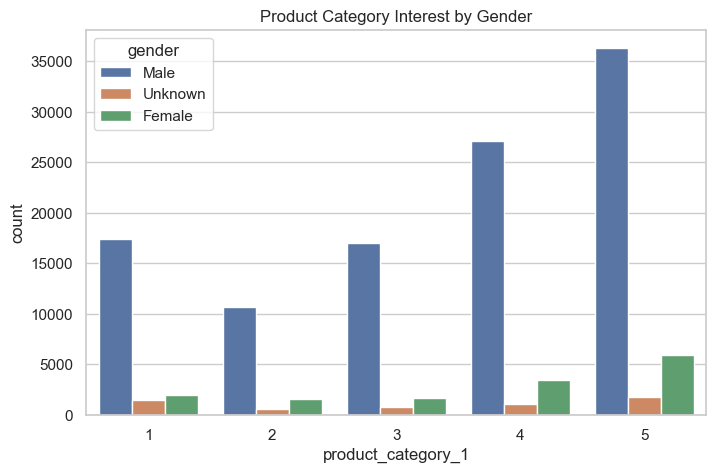

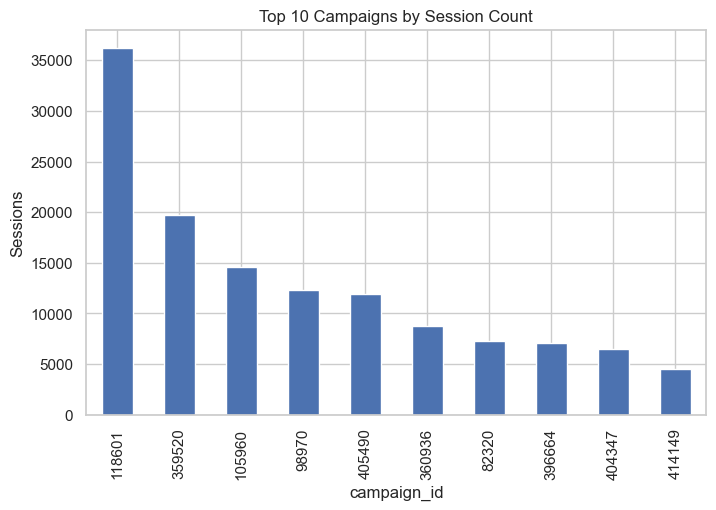

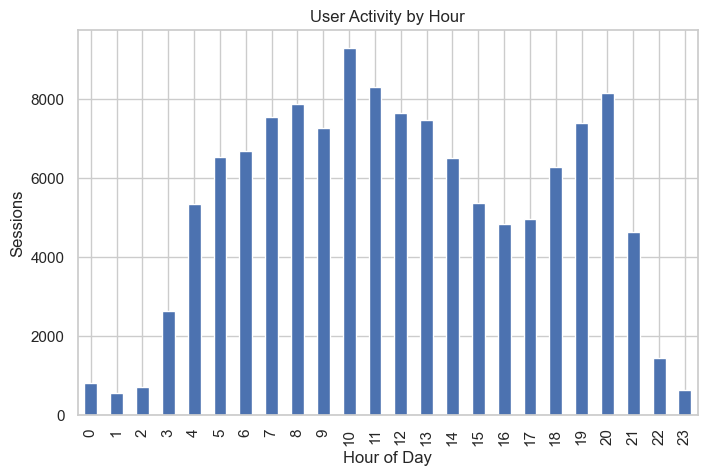

In [ ]:

# 5. Data Visualization (Matplotlib/Seaborn)

sns.set(style="whitegrid")

# Product category by gender
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='product_category_1', hue='gender')
plt.title("Product Category Interest by Gender")
plt.savefig("category_gender.png")
plt.show()

# Campaign performance
plt.figure(figsize=(8,5))
campaign_perf.head(10).plot(kind='bar')
plt.title("Top 10 Campaigns by Session Count")
plt.ylabel("Sessions")
plt.savefig("campaign_perf.png")
plt.show()

# Hourly activity
plt.figure(figsize=(8,5))
hourly_activity.plot(kind='bar')
plt.title("User Activity by Hour")
plt.ylabel("Sessions")
plt.xlabel("Hour of Day")
plt.savefig("hourly_activity.png")
plt.show()

In [50]:
# 6. Export clean data for Power BI

df.to_csv("Ad_click_CTR.csv", index=False)
print("\nCleaned dataset exported successfully: cleaned_ecommerce_sessions.csv")


Cleaned dataset exported successfully: cleaned_ecommerce_sessions.csv
